### Importing Libraries

In [2]:
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
from matplotlib import pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import os
from gensim import corpora
from gensim.summarization import keywords
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
os.chdir("C://Users//Mittal//Desktop//Python//lawnics 2")
cur_path=os.getcwd()
print(cur_path)

C:\Users\Mittal\Desktop\Python\lawnics 2


### Preparing Dataset

In [4]:
m=os.path.join(cur_path,"Train_docs")
m=str(m)
documents=[]
p=""
for i in os.listdir(m):
    s=""
    p=m+"\\"+str(i)
    with open(p, "r") as file:
        data = file.readlines()
        for line in data:
            s+=line.strip()
        documents.append(s)

In [5]:
m=os.path.join(cur_path,"Train_tags")
m=str(m)
tags=[]
p=""
for i in os.listdir(m):
    s=""
    p=m+"\\"+str(i)
    with open(p, "r") as file:
        data = file.readlines()
        for line in data:
            s+=line.strip()
        tags.append(s)

In [6]:
print(len(tags),len(documents))

80 80


In [7]:
df=pd.DataFrame({'Tags':tags,'Documents':documents})
df.head()

Tags  \
0  Absence, Access, Accident, Account, Acquisitio...   
1                                    Cause of Action   
2                                                 Ad   
3  Abuse of Process, Accusation, Accused, Adjourn...   
4  Acceptance, Bank, Cheque, Debt, Demand, Dishon...   

                                           Documents  
0  Kurian Joseph, J.1. Leave granted in Special L...  
1  Arijit Pasayat, J.1. All these cases relate to...  
2  R.C. Lahoti, J.1. No person shall be deprived ...  
3  1. Leave granted.We have heard learned Counsel...  
4  S. Rajendra Babu, J.1. This appeal is filed un...

### Cleaning the dataset

In [8]:
stop=set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()
def clean(text):
    stop_free=" ".join([word for word in text.lower().split() if word not in stop])
    punc_free="".join([ch for ch in stop_free if ch not in exclude])
    normalized=" ".join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized

In [9]:
df['Documents_new']=df['Documents'].apply(lambda x:clean(x))
df.head()

Tags  \
0  Absence, Access, Accident, Account, Acquisitio...   
1                                    Cause of Action   
2                                                 Ad   
3  Abuse of Process, Accusation, Accused, Adjourn...   
4  Acceptance, Bank, Cheque, Debt, Demand, Dishon...   

                                           Documents  \
0  Kurian Joseph, J.1. Leave granted in Special L...   
1  Arijit Pasayat, J.1. All these cases relate to...   
2  R.C. Lahoti, J.1. No person shall be deprived ...   
3  1. Leave granted.We have heard learned Counsel...   
4  S. Rajendra Babu, J.1. This appeal is filed un...   

                                       Documents_new  
0  kurian joseph j1 leave granted special leave p...  
1  arijit pasayat j1 case relate establishment fu...  
2  rc lahoti j1 person shall deprived life person...  
3  1 leave grantedwe heard learned counsel party ...  
4  s rajendra babu j1 appeal filed section 101 sp...

In [10]:
df.drop(columns='Documents',inplace=True)
df.head()

Tags  \
0  Absence, Access, Accident, Account, Acquisitio...   
1                                    Cause of Action   
2                                                 Ad   
3  Abuse of Process, Accusation, Accused, Adjourn...   
4  Acceptance, Bank, Cheque, Debt, Demand, Dishon...   

                                       Documents_new  
0  kurian joseph j1 leave granted special leave p...  
1  arijit pasayat j1 case relate establishment fu...  
2  rc lahoti j1 person shall deprived life person...  
3  1 leave grantedwe heard learned counsel party ...  
4  s rajendra babu j1 appeal filed section 101 sp...

# Tags Generation

### 1. Using Non-Negative Matrix Factorization (NMF)

NMF approximates a matrix X with a low-rank matrix approximation such that it gives two non-negative matrices (W, H) whose product approximates the non- negative matrix X.

In [11]:
cv=TfidfVectorizer(lowercase=True,stop_words='english',ngram_range=(2,3),min_df=4,max_df=0.7,max_features=150)
dtm=cv.fit_transform(df['Documents_new'])
dtm

<80x150 sparse matrix of type '<class 'numpy.float64'>'
	with 2134 stored elements in Compressed Sparse Row format>

In [12]:
feature_names=cv.get_feature_names()

In [13]:
print(feature_names[:10],len(feature_names))

['accused person', 'act 1956', 'act 1963', 'act enacted', 'act section', 'amendment act', 'andhra pradesh', 'appeal allowed', 'appeal filed', 'appellate court'] 150


In [15]:
clf=NMF(n_components=20,random_state=1)
W1=clf.fit(dtm)
H1=clf.components_

c:\users\mittal\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
c:\users\mittal\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


H1 provides the association for the topics with the words

W1 tells us which topic is promminent in which scenario

In [16]:
print(H1.shape)

(20, 150)


In [17]:
print(W1)

NMF(n_components=20, random_state=1)


In [18]:
single_topic=H1[0]
single_topic.argsort()

array([  0, 101, 100,  99,  98,  97,  95,  94,  93,  91,  83,  81,  80,
        79,  77,  75, 148,  73,  72,  71,  70,  68,  67,  66,  62,  61,
       103, 104, 105, 106, 146, 144, 143, 142, 141, 138, 136, 133, 132,
       129, 127, 125,  60, 124, 120, 119, 118, 117, 116, 115, 114, 113,
       112, 110, 109, 108, 122,  58,  74, 149,  39,  37,   9,  33,  31,
        30,  57,  27,  25,  24,  23,  22,  21,  19,  17,  16,  15,  12,
        10,   6,  40,  36,   3,   5,   2,  44,  51,   4,  53,  52,  43,
        55,  42,   1,  47,  28,  54, 140,  20, 128, 126,  96, 145,  82,
        13, 107, 139, 134, 111,  26, 137,  63, 147,  84, 102,  85,  86,
       135,  92, 131, 123,   8,  48,  11,  35,  14,  87, 121,  56,  38,
        78,   7,  29,  59,  45,  41, 130,  18,  34,  50,  46,  90,  89,
        32,  69,  49,  88,  76,  65,  64], dtype=int64)

In [19]:
top_word_indices=single_topic.argsort()[-10:]
for index in top_word_indices:
    print(feature_names[index])

evidence record
passed high court
passed high
counsel appellant
learned counsel appellant
fact circumstance
order passed
letter dated
judgment order dated
judgment order


In [20]:
for index,topic in enumerate(H1):
    print('Top 15 Words for topic {}'.format(index))
    print([feature_names[i] for i in topic.argsort()[-15:]])
    print()

Top 15 Words for topic 0
['decision court', 'state government', 'circumstance case', 'court case', 'fact circumstance case', 'evidence record', 'passed high court', 'passed high', 'counsel appellant', 'learned counsel appellant', 'fact circumstance', 'order passed', 'letter dated', 'judgment order dated', 'judgment order']

Top 15 Words for topic 1
['hereinafter referred', 'learned judge', 'provision section', 'offence section', 'evidence act', 'read section', 'offence punishable section', 'punishable section', 'offence punishable', 'section 304b', 'trial court', 'section 498a', 'penal code', 'indian penal code', 'indian penal']

Top 15 Words for topic 2
['counsel party', 'subject matter', 'case supra', 'central government', 'step taken', 'petition filed', 'impugned order', 'union india', 'learned additional', 'large number', 'interim order', 'state government', 'government india', 'solicitor general', 'writ petition']

Top 15 Words for topic 3
['indian penal', 'state bihar', 'indian p

In [21]:
topic_results=clf.transform(dtm)
topic_results.shape

(80, 20)

In [22]:
d=[]
for i in range(80):
    d.append([feature_names[i] for i in topic_results[i].round(2).argsort()[-3:]])

In [23]:
d

[['case court', 'appellate court', 'application filed'],
 ['act section', 'act enacted', 'case court'],
 ['case supra', 'act enacted', 'bench decision'],
 ['central government', 'act section', 'act 1956'],
 ['act 1963', 'act 1956', 'bench decision'],
 ['act section', 'andhra pradesh', 'appellate court'],
 ['accused person', 'appeal allowed', 'act section'],
 ['circumstance case', 'bench decision', 'act 1963'],
 ['act 1963', 'appellate tribunal', 'act section'],
 ['accused person', 'bench court', 'act 1956'],
 ['case supra', 'chief justice', 'case court'],
 ['act 1963', 'circumstance case', 'accused person'],
 ['act 1963', 'act 1956', 'act enacted'],
 ['bench court', 'amendment act', 'central government'],
 ['civil appeal', 'appeal filed', 'appellate tribunal'],
 ['chief justice', 'civil appeal', 'appeal allowed'],
 ['chief justice', 'civil appeal', 'case court'],
 ['appellate court', 'case supra', 'act 1956'],
 ['civil appeal', 'central government', 'chief justice'],
 ['act enacted', '

In [24]:
df['tags_newly_generated']=d

In [27]:
df.head()

Tags  \
0  Absence, Access, Accident, Account, Acquisitio...   
1                                    Cause of Action   
2                                                 Ad   
3  Abuse of Process, Accusation, Accused, Adjourn...   
4  Acceptance, Bank, Cheque, Debt, Demand, Dishon...   

                                       Documents_new  \
0  kurian joseph j1 leave granted special leave p...   
1  arijit pasayat j1 case relate establishment fu...   
2  rc lahoti j1 person shall deprived life person...   
3  1 leave grantedwe heard learned counsel party ...   
4  s rajendra babu j1 appeal filed section 101 sp...   

                               tags_newly_generated  
0  [case court, appellate court, application filed]  
1            [act section, act enacted, case court]  
2         [case supra, act enacted, bench decision]  
3       [central government, act section, act 1956]  
4              [act 1963, act 1956, bench decision]

### 2. Using Gensim to Extract the keywords from the text

This module contains functions to find keywords of the text and building graph on tokens from text.

In [28]:
add=[]
for i in range(df.shape[0]):
    a=[keywords(df['Documents_new'][i])]
    s=a[0].split("\n")
    g=[]
    for i in s:
        f=i.split(" ")
        if len(f)>=2:
            g.append(i)
    add.append(g)

In [29]:
add

[['fair compensation',
  'land acquired',
  'property village',
  'claimed applicant',
  'acquisition act',
  'state highway',
  'true market'],
 ['courts learned',
  'retired judge',
  'establishment functioning court',
  'constitution india',
  'appointment stand',
  'state deal',
  'promotion judicial',
  'adverse service',
  'government required',
  'officer eligible member',
  'vacancy created',
  'necessary step establish',
  'addition number',
  'effected implemented filling',
  'observation regard',
  'finance commission',
  'order additional',
  'general given',
  'allocation fund',
  'continue regular',
  'continued utility',
  'strength existing ratio',
  'hand recommendation'],
 ['constitutional obligation court allowed',
  'proceeded criminal law',
  'commencing accusation',
  'strength directive principle state',
  'accusing offence section',
  'country holding right speedy trial',
  'time limit nature',
  'enacting judicial',
  'justice appropriate',
  'bar limitation',


In [30]:
df['Keywords']=add

In [31]:
df['Final_Tags']=df['tags_newly_generated']+df['Keywords']

In [32]:
df.drop(columns=['tags_newly_generated','Keywords'],inplace=True)

In [33]:
df.head()

Tags  \
0  Absence, Access, Accident, Account, Acquisitio...   
1                                    Cause of Action   
2                                                 Ad   
3  Abuse of Process, Accusation, Accused, Adjourn...   
4  Acceptance, Bank, Cheque, Debt, Demand, Dishon...   

                                       Documents_new  \
0  kurian joseph j1 leave granted special leave p...   
1  arijit pasayat j1 case relate establishment fu...   
2  rc lahoti j1 person shall deprived life person...   
3  1 leave grantedwe heard learned counsel party ...   
4  s rajendra babu j1 appeal filed section 101 sp...   

                                          Final_Tags  
0  [case court, appellate court, application file...  
1  [act section, act enacted, case court, courts ...  
2  [case supra, act enacted, bench decision, cons...  
3  [central government, act section, act 1956, ch...  
4  [act 1963, act 1956, bench decision, transacti...

# Validating Final_Tags Based on Visualization(wordcloud)

For article 0



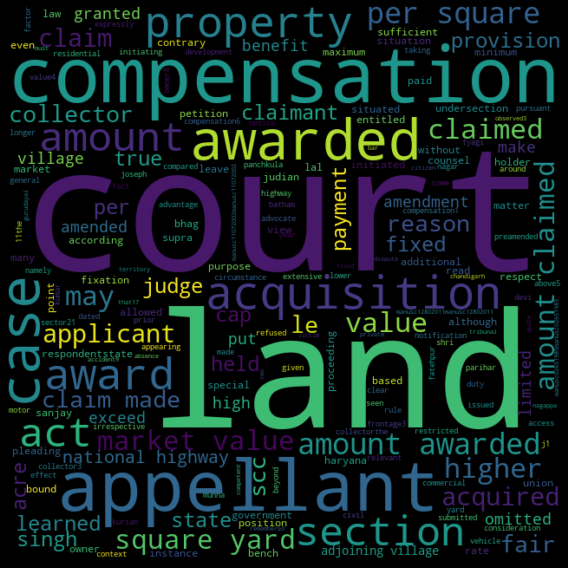

['case court', 'appellate court', 'application filed', 'fair compensation', 'land acquired', 'property village', 'claimed applicant', 'acquisition act', 'state highway', 'true market']

For article 1



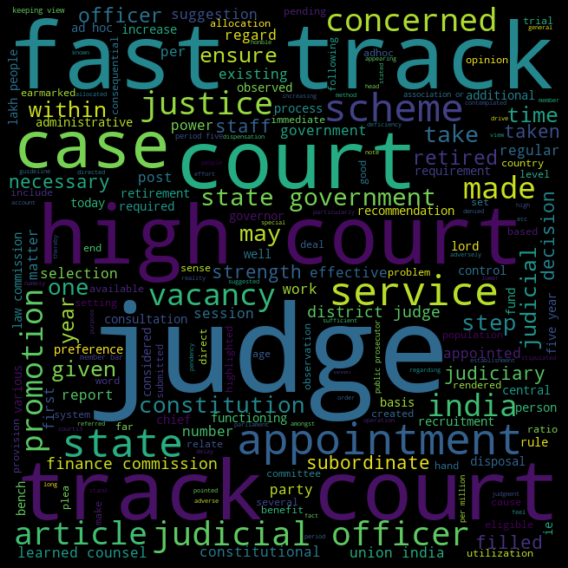

['act section', 'act enacted', 'case court', 'courts learned', 'retired judge', 'establishment functioning court', 'constitution india', 'appointment stand', 'state deal', 'promotion judicial', 'adverse service', 'government required', 'officer eligible member', 'vacancy created', 'necessary step establish', 'addition number', 'effected implemented filling', 'observation regard', 'finance commission', 'order additional', 'general given', 'allocation fund', 'continue regular', 'continued utility', 'strength existing ratio', 'hand recommendation']

For article 2



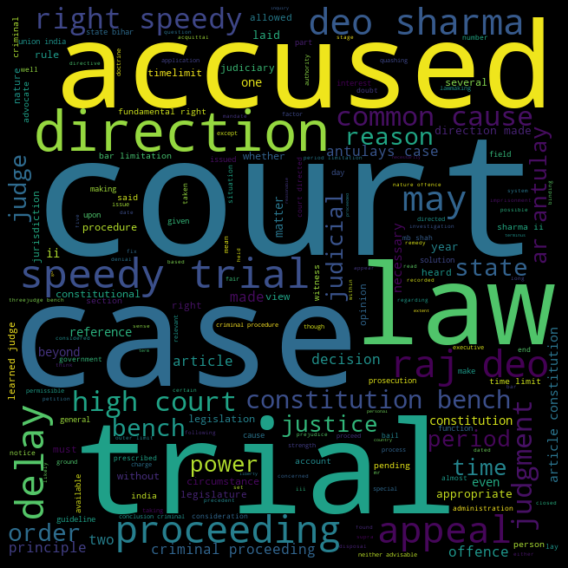

['case supra', 'act enacted', 'bench decision', 'constitutional obligation court allowed', 'proceeded criminal law', 'commencing accusation', 'strength directive principle state', 'accusing offence section', 'country holding right speedy trial', 'time limit nature', 'enacting judicial', 'justice appropriate', 'bar limitation', 'fair reasonable', 'dealing power', 'legislates observes', 'lawmaking legislator', 'person shall deprived', 'apply prosecution', 'issuing notice', 'applicable like', 'personal liberty', 'noticed common ground', 'record express', 'rule bound', 'enforceable effective', 'refers role', 'issue acquittal', 'oppressive meaning', 'executive act', 'forming opinion', 'author recording', 'fix timelimit', 'appeared special', 'observation need', 'noticing respective', 'certain proposition', 'day filing', 'imprisonment provided', 'year elapsed obliged acquit', 'regard considered', 'conviction making', 'petition quashing', 'devising solution', 'iii required', 'acquitting discha

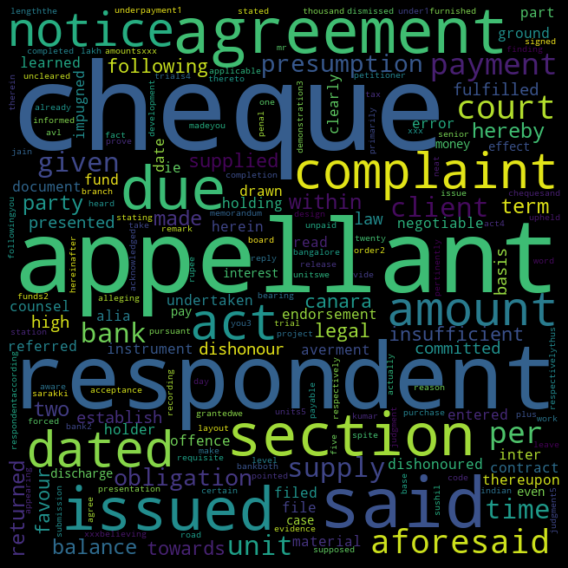

['central government', 'act section', 'act 1956', 'cheque dated', 'supplied unit', 'payment term said agreement', 'filed complaint section', 'file aforesaid', 'dishonoured presentation', 'presumption law', 'learned counsel party', 'time release']

For article 4



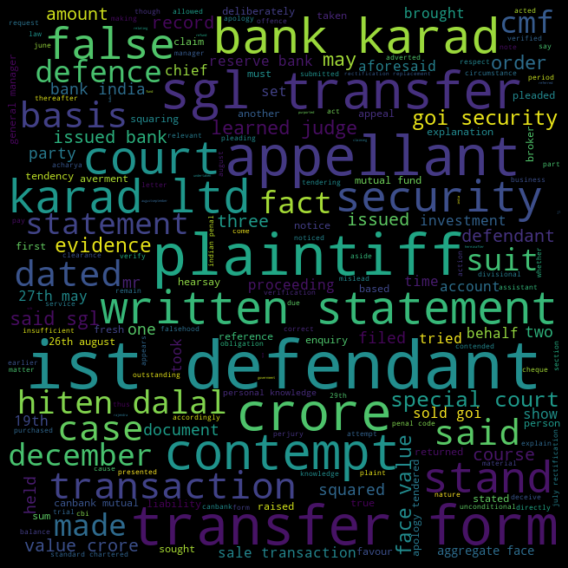

['act 1963', 'act 1956', 'bench decision', 'transaction security', 'special court', 'false defence pleaded', 'verifies falsely', 'course written statement', 'squared basis document', 'took stand', 'person proceeded', 'sgl transfer form', 'fund cmf', 'appeal filed', 'hiten dalal', 'personal knowledge', 'crore claiming', 'notice issued', 'learned judge', 'apology tendered stated']

For article 5



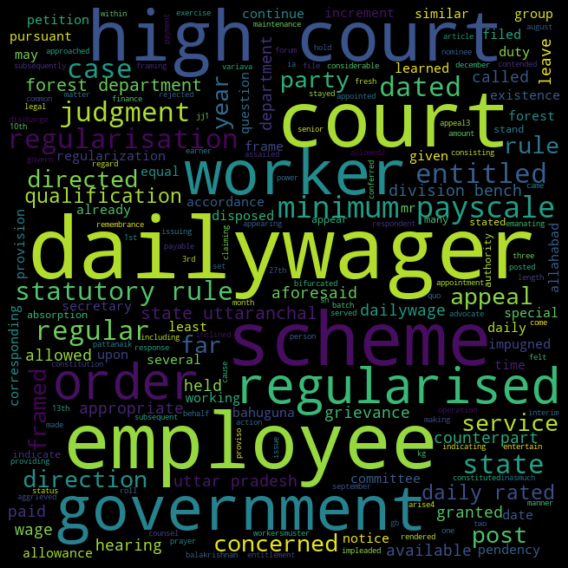

['act section', 'andhra pradesh', 'appellate court', 'high court', 'govern case dailywagers', 'employee working', 'regularization service', 'allowed appeal', 'forest department', 'government frame scheme']

For article 6



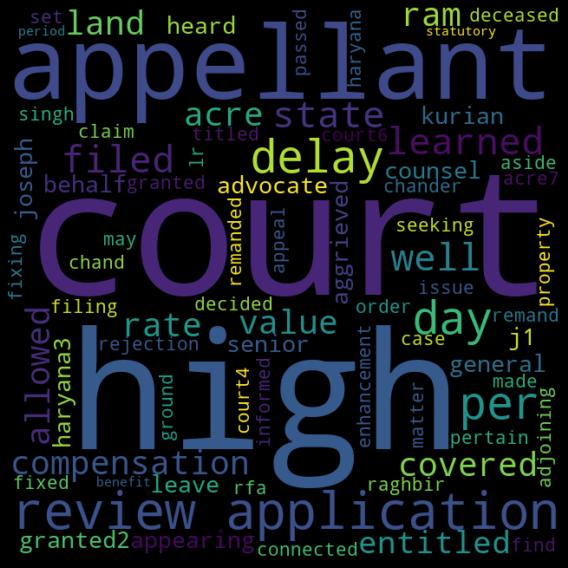

['accused person', 'appeal allowed', 'act section', 'high court']

For article 7



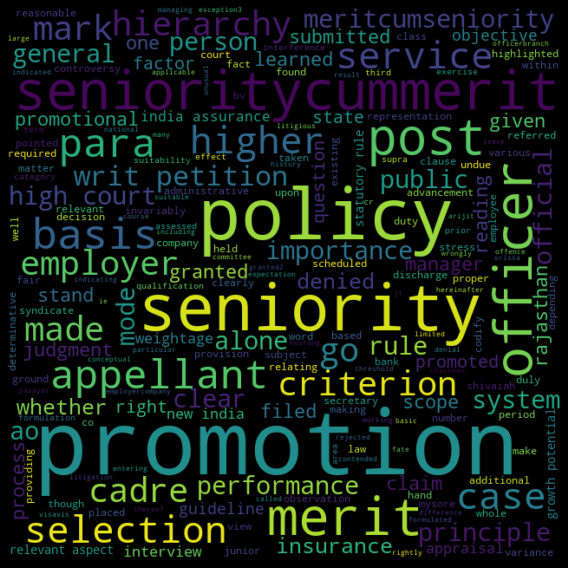

['circumstance case', 'bench decision', 'act 1963', 'employer promotional policy', 'administrative officer', 'cadre general manager', 'higher hierarchy', 'judgment learned', 'principle meritcumseniority', 'writ petition', 'bank scheduled', 'process selection', 'insurance company']

For article 8



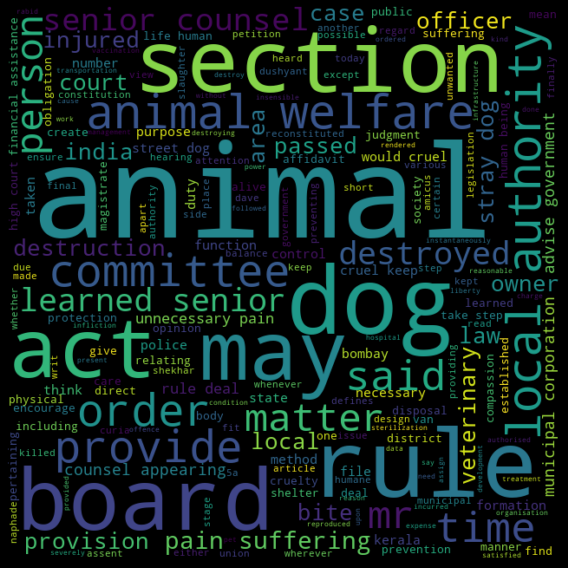

['act 1963', 'appellate tribunal', 'act section', 'stray dog', 'control rule', 'order passed', 'encouraging providing', 'municipality act', 'welfare board', 'local authority mean', 'advise government', 'heard learned counsel', 'matter finally', 'sterilized vaccinated', 'legislating prevention', 'purpose final disposal', 'municipal corporation legislation', 'public opinion', 'transportation sheltering', 'preventing unnecessary', 'formation establishment']

For article 9



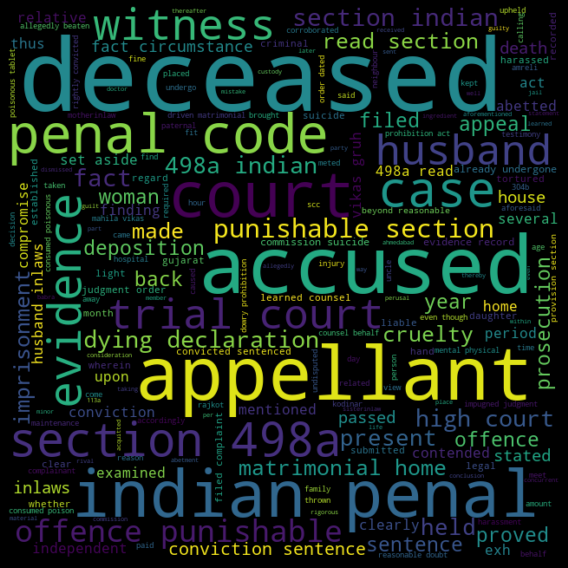

['accused person', 'bench court', 'act 1956', 'high court', 'recording evidence', 'appeal filed appellant', 'witness recorded', 'husband inlaws', 'conviction sentence', 'convicting sentencing', 'convicted sentenced present', 'offence punishable', 'matrimonial home', 'presently undergoing', 'passed criminal', 'examined submitted', 'dying declaration', 'come running', 'deposition relative', 'allegedly tortured', 'consumed poison', 'set aside']



In [34]:
for i in range(df.shape[0]-70):
    print('For article {}'.format(i))
    print()
    wordcloud=WordCloud(
    width=640,
    height=640,
    background_color="black",
    stopwords=STOPWORDS).generate(str(df['Documents_new'][i]))

    fig=plt.figure(figsize=(12,8),facecolor="k",edgecolor="k")
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    print(df['Final_Tags'][i])
    print()

# Generating Tags For The Test data


In [35]:
m=os.path.join(cur_path,"Test_docs")
m=str(m)
documents=[]
p=""
for i in os.listdir(m):
    s=""
    p=m+"\\"+str(i)
    with open(p, "r") as file:
        data = file.readlines()
        for line in data:
            s+=line.strip()
        documents.append(s)

In [36]:
df1=pd.DataFrame({'Test Documents':documents})
df1.head()

Test Documents
0  P. Venkatarama Reddi, J.1. The opinion recorde...
1  G.B. Pattanaik, J.1. This batch of Special Lea...
2  1. After hearing the Learned Counsel for both ...
3  1. This appeal is directed against the judgmen...
4  1. An issue raised by the appellants was that ...

In [37]:
df1['Test Documents']=df1['Test Documents'].apply(lambda x:clean(x))
df1.head()

Test Documents
0  p venkatarama reddi j1 opinion recorded kerala...
1  gb pattanaik j1 batch special leave petition s...
2  1 hearing learned counsel party length find ag...
3  1 appeal directed judgment order passed high c...
4  1 issue raised appellant search conducted shop...

In [38]:
df1.shape

(101, 1)

In [39]:
dtm1=cv.fit_transform(df1['Test Documents'])
dtm1

<101x150 sparse matrix of type '<class 'numpy.float64'>'
	with 2845 stored elements in Compressed Sparse Row format>

In [41]:
feature_names=cv.get_feature_names()
W1=clf.fit(dtm)
H1=clf.components_
print(feature_names)
print(H1.shape)

['accordance law', 'accordance provision', 'accused person', 'acquisition act', 'acquisition land', 'act applicable', 'act rule', 'act section', 'amendment act', 'andhra pradesh', 'appeal allowed', 'appeal filed', 'appeal high', 'appearing behalf', 'appellate court', 'appellate tribunal', 'application filed', 'article 14', 'article 226', 'behalf appellant', 'behalf respondent', 'bench court', 'came conclusion', 'case court', 'case hand', 'case supra', 'central government', 'circumstance case', 'civil appeal', 'civil court', 'civil procedure', 'code civil', 'code civil procedure', 'code criminal', 'code criminal procedure', 'company act', 'constitution india', 'counsel appearing', 'counsel appearing behalf', 'counsel appellant', 'counsel respondent', 'court case', 'court held', 'court high', 'court high court', 'court judge', 'court jurisdiction', 'court observed', 'court order', 'court shall', 'criminal procedure', 'debt recovery', 'decision court', 'division bench', 'excise duty', 'ex

c:\users\mittal\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
c:\users\mittal\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [42]:
topic_results=clf.transform(dtm1)
topic_results.shape

(101, 20)

In [43]:
d=[]
for i in range(df1.shape[0]):
    d.append([feature_names[i] for i in topic_results[i].round(2).argsort()[-3:]])

In [44]:
d

[['acquisition land', 'accordance provision', 'appeal filed'],
 ['act rule', 'accused person', 'article 14'],
 ['appeal filed', 'amendment act', 'accused person'],
 ['acquisition land', 'behalf appellant', 'article 14'],
 ['appellate tribunal', 'article 14', 'behalf appellant'],
 ['andhra pradesh', 'article 14', 'accordance provision'],
 ['appeal high', 'appellate tribunal', 'accordance provision'],
 ['accused person', 'behalf appellant', 'amendment act'],
 ['acquisition land', 'application filed', 'amendment act'],
 ['appeal allowed', 'article 14', 'acquisition land'],
 ['andhra pradesh', 'accused person', 'amendment act'],
 ['accordance law', 'appeal filed', 'accused person'],
 ['appeal high', 'appeal allowed', 'amendment act'],
 ['accordance provision', 'article 226', 'behalf appellant'],
 ['article 226', 'andhra pradesh', 'application filed'],
 ['article 14', 'accordance provision', 'appellate court'],
 ['accordance provision', 'act rule', 'behalf appellant'],
 ['accordance provisi

In [45]:
df1['Tags Using NMF']=d

In [46]:
df1.head()

Test Documents  \
0  p venkatarama reddi j1 opinion recorded kerala...   
1  gb pattanaik j1 batch special leave petition s...   
2  1 hearing learned counsel party length find ag...   
3  1 appeal directed judgment order passed high c...   
4  1 issue raised appellant search conducted shop...   

                                      Tags Using NMF  
0  [acquisition land, accordance provision, appea...  
1             [act rule, accused person, article 14]  
2      [appeal filed, amendment act, accused person]  
3   [acquisition land, behalf appellant, article 14]  
4  [appellate tribunal, article 14, behalf appell...

In [49]:
add=[]
for i in range(df1.shape[0]):
    a=[keywords(df1['Test Documents'][i])]
    s=a[0].split("\n")
    g=[]
    for i in s:
        f=i.split(" ")
        if len(f)>=2:
            g.append(i)
    add.append(g)

In [50]:
df1['Tags Using Gensim(Keywords)']=add
df1.head()

Test Documents  \
0  p venkatarama reddi j1 opinion recorded kerala...   
1  gb pattanaik j1 batch special leave petition s...   
2  1 hearing learned counsel party length find ag...   
3  1 appeal directed judgment order passed high c...   
4  1 issue raised appellant search conducted shop...   

                                      Tags Using NMF  \
0  [acquisition land, accordance provision, appea...   
1             [act rule, accused person, article 14]   
2      [appeal filed, amendment act, accused person]   
3   [acquisition land, behalf appellant, article 14]   
4  [appellate tribunal, article 14, behalf appell...   

                         Tags Using Gensim(Keywords)  
0  [case tribunal, dispute relates assessment yea...  
1  [shop block, petition state, order directing, ...  
2        [appellate tribunal, learned counsel party]  
3  [fact case appellant, appeal directed judgment...  
4                     [order high, appellant search]

In [51]:
df1['Final Tags']=df1['Tags Using NMF']+df1['Tags Using Gensim(Keywords)']

In [52]:
df1.drop(columns=['Tags Using Gensim(Keywords)','Tags Using NMF'],inplace=True)
df1.head()

Test Documents  \
0  p venkatarama reddi j1 opinion recorded kerala...   
1  gb pattanaik j1 batch special leave petition s...   
2  1 hearing learned counsel party length find ag...   
3  1 appeal directed judgment order passed high c...   
4  1 issue raised appellant search conducted shop...   

                                          Final Tags  
0  [acquisition land, accordance provision, appea...  
1  [act rule, accused person, article 14, shop bl...  
2  [appeal filed, amendment act, accused person, ...  
3  [acquisition land, behalf appellant, article 1...  
4  [appellate tribunal, article 14, behalf appell...